In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv("anon_Admit_Report.csv", encoding="unicode_escape") #data set

In [183]:
df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12647 entries, 0 to 12646
Data columns (total 45 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Applicant                                                                                                                           12647 non-null  int64  
 1   Application                                                                                                                         12647 non-null  int64  
 2   Created date                                                                                                                        12647 non-null  object 
 3   Submitted date                                                                   

In [184]:
#df.drop(["Order ID", "unamed1"], axis=1, inplace=True) remove rows
pd.isnull(df).sum() 
null_counts = pd.isnull(df).sum()
print(null_counts)

Applicant                                                                                                                                 0
Application                                                                                                                               0
Created date                                                                                                                              0
Submitted date                                                                                                                            0
Offer type                                                                                                                                0
Offer course name                                                                                                                         0
Gender                                                                                                                                    0
Special needs       

In [185]:

filtered_nulls = null_counts[null_counts < 500]

print(filtered_nulls)




Applicant                                                                                  0
Application                                                                                0
Created date                                                                               0
Submitted date                                                                             0
Offer type                                                                                 0
Offer course name                                                                          0
Gender                                                                                     0
Education - Block 1: Level of education                                                   46
Language: native                                                                           2
Extra question: Have you applied to Ashesi before? If "yes" indicate the year.            80
Extra question: Have any of your family members gained admission to As

In [186]:
# Find columns with > 500 nulls
null_counts = pd.isnull(df).sum()
cols_to_drop = null_counts[null_counts > 500].index

# Drop them from the dataset
df_dropped = df.drop(columns=cols_to_drop)
df_dropped = df.drop(columns=["Extra question: How did you hear about Ashesi? You can select all that apply to you:"])
df_dropped.shape
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12647 entries, 0 to 12646
Data columns (total 44 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Applicant                                                                                                                           12647 non-null  int64  
 1   Application                                                                                                                         12647 non-null  int64  
 2   Created date                                                                                                                        12647 non-null  object 
 3   Submitted date                                                                   

In [187]:
df_dropped['Created date'] = pd.to_datetime(df_dropped['Created date']).dt.to_period('M')
df_dropped['Submitted date'] = pd.to_datetime(df_dropped['Submitted date'], errors='coerce').dt.to_period('M')

# print(df_dropped['Created date'])


/var/folders/6g/n1qq009n3_d6hxkwbx1stm9m0000gn/T/ipykernel_13713/1973988504.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_dropped['Created date'] = pd.to_datetime(df_dropped['Created date']).dt.to_period('M')


In [188]:
df_dropped['Submitted date'] = pd.to_datetime(
    df_dropped['Submitted date'], errors='coerce'
).dt.to_period('M')
# df_dropped = df_dropped.drop(columns=["Extra question: How did you hear about Ashesi? You can select all that apply to you:"])
# print(df_dropped['Submitted date'])df_dropped['Created date'] = pd.to_datetime(df_dropped['Created date'], errors='coerce').dt.to_period('M')

In [189]:
print(df_dropped['Offer type'].unique())
# print(df_dropped['Offer type'])

['Failed' 'Withdrawn' 'Enrolled' 'Auto Deny' 'Admission Package'
 'Unreplied' 'Ready for committee' 'Positive Feedback'
 'Positive Feedback (Sep)']


In [190]:
print(df_dropped['Offer course name'].unique())
# print(df_dropped['Offer type'])

['[B.Sc.] Computer Science' '[B.Sc.] Management Information Systems'
 '[B.Sc.] Electrical/Electronic Engineering'
 '[B.Sc.] Computer Engineering' '[B.Sc.] Mechanical Engineering'
 '[B.Sc.] Business Administration' '[B.Sc.] Mechatronic Engineering'
 '[B.Sc.] Economics' '[LLB] Law with Public Policy']


In [191]:
print(df_dropped['Gender'].unique())

['M' 'F']


In [192]:
print(df_dropped['Extra question: Type of Exam'].unique())

['WASSCE - Ghana' "IGCSE 'A' Level" "GCE 'O' LEVEL" 'Other Official Exam'
 'WASSCE - Ghana\nOther Official Exam' 'WASSCE - Gambia'
 'High School Diploma\nOther Official Exam' 'High School Diploma'
 "WASSCE - Ghana\nIGCSE 'A' Level" "IGCSE 'A' Level\nOther Official Exam"
 "IGCSE 'A' Level\nHigh School Diploma"
 "WASSCE - Sierra Leone\nIGCSE 'A' Level\nOther Official Exam"
 'International Baccalaureate (IB) Diploma' 'WASSCE - Nigeria'
 "IGCSE 'A' Level\nGCE 'O' LEVEL"
 "IGCSE 'A' Level\nInternational Baccalaureate (IB) Diploma"
 'High School Diploma\nWASSCE - Nigeria'
 "WASSCE - Gambia\nIGCSE 'A' Level" "IGCSE 'A' Level\nWASSCE - Nigeria"
 'International Baccalaureate (IB) Diploma\nHigh School Diploma'
 'WASSCE - Sierra Leone' 'Other Official Exam\nWASSCE - Nigeria'
 'High School Diploma\nOther Official Exam\nWASSCE - Nigeria'
 'WASSCE - Liberia' 'WASSCE - Ghana\nHigh School Diploma'
 'WASSCE - Liberia\nHigh School Diploma'
 'International Baccalaureate (IB) Diploma\nOther Official Exam'

In [193]:
print(df_dropped['Language: native'].unique())

['ee' 'en' 'fat' 'yo' 'luo' 'ki' 'gaa' 'bfd' 'ak' 'so' 'ha' 'myv' 'tw'
 'rw' 'sn' 'bem' 'ig' 'fr' 'und' 'gn' 'tum' 'am' 'ny' 'byv' 'sw' 'ff' 'nd'
 'om' 'rwk' 'teo' 'nr' 'mul' 'ss' 'bas' 'man' 'ada' 'st' 'enm' 'zxx' 'af'
 'dje' 'nyo' 'ar' 'kfo' 'ach' 'bm' 'nzi' 'efi' 'dyo' 'fon' 'bum' 'wo'
 'mos' 'ab' 'dv' 'kpe' 'bkm' 'swc' 'mas' 'kam' 'mi' 'luy' 'idu' 'lg' 'nyn'
 'pt' 'ybb' 'men' 'zu' 'kln' 'nym' 'bg' 'dua' 'tog' 'eo' 'din' 'dzg' 'lag'
 'rn' 'yao' 'ksf' 'sid' 'mgo' 'ts' 'nus' 'dz' 'ln' 'frr' 'es' 'ibb' 'si'
 'wal' 'nnh' 'tiv' 've' 'ast' 'guz' 'ban' 'ace' 'jgo' 'lua' 'ang' 'xog'
 'loz' 'wae' 'dar' 'su' 'saq' 'yue' 'syc' 'ta' 'mni' 'tem' 'kr' 'bbj'
 'gur' 'tn' 'ti' 'kg' 'lu' nan 'mer' 'pcm' 'ebu' 'bax' 'lfn' 'kri']


In [194]:
mask = 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'

no_entries = df_dropped.loc[
    df_dropped[mask]
    .str.contains(r'yes', case=False, na=False),
    mask
]
print(no_entries.unique())
print(len(no_entries.unique()))

['yes 2017' 'Yes, I have applied it last year 2017' 'yes, 2016'
 'Yes, 2017' 'Yes (AIX 2017)' 'Yes in 2017' 'Yes, in 2017' 'Yes 2017'
 'Yes, 2017.' 'Yes, 2016' 'Yes - 2016 and 2017' 'yes, in 2017.'
 'yes in 2017' 'Yes,2017' 'YES' 'Yes. 2017' 'Yes (2018)' 'YES (2018)'
 'Yes' 'Yes. 2018' 'Yes, 2018' 'Yes 2018'
 'Yes. In the year 2018 for the 2018 intake' 'yes(2018)' 'Yes/2018.'
 "Yes, 2018 session, but I didn't complete it." 'YES, 2018' 'yes 2018'
 'Yes in 2017 and 2018' 'Yes - 2018' 'Yes, in the year 2018' 'Yes(2018)'
 'yes in 2017 and 2018' 'yes - 2018' 'Yes, in 2018' 'Yes please (2018)'
 'Yes (2014)' 'Yes- 2018' 'Yes, I applied in 2018.' 'Yes  2017'
 'Yes,2017/2018 and 2018/2019' 'Yes  2018' 'Yes, 2017/2018 Academic Year'
 'Yes-2018' 'Yes: 2018' 'Yes. 2018.' 'yes, in 2018' 'yes, this year'
 'yes. 2018' 'Yes, 2018.' 'YES 2019' 'YES ,2018' 'Yes,2019' 'Yes, 2019'
 'Yes! 2019' 'Yes ,2019' 'Yes ; 2019' 'Yes (2019/2020)' 'Yes . 2019'
 'Yes, 2019/2020' 'Yes 2019'
 'Yes I have applied to Ashe

In [195]:
mask = 'Extra question: Have any of your family members gained admission to Ashesi University?'

no_entries = df_dropped.loc[
    df_dropped[mask]
    .str.contains(r'', case=False, na=False),
    mask
]
print(no_entries.unique())
print(len(no_entries.unique()))

['No' 'Yes']
2


In [196]:
print(df_dropped['Education - Block 1: Level of education'].unique())

['SE' 'OQ' 'VO' 'BA' 'EX' nan]


In [197]:
# Replace 'wassce ghana' with 'WSCE GH' in the specified column
# df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace("IGCSE 'A' Level\nWASSCE - Nigeria", 'IGCSE A Level')
# df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace('High School Diploma', 'WASSCE - Ghana')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r'Other Official Exam\nWASSCE - Nigeria', 'WASSCE - Nigeria')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r'Other Official Exam\nWASSCE - Nigeria', 'WASSCE - Nigeria')
# df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace('International Baccalaureate (IB) Diploma', 'International Baccalaureate')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r'Other Official Exam\nWASSCE - Nigeria', 'WASSCE - Nigeria')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r"WASSCE - Sierra Leone\nIGCSE 'A' Level\nOther Official Exam", 'WASSCE - Sierra Leone')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r"International Baccalaureate (IB) Diploma\nHigh School Diploma\nOther Official Exam",'International Baccalaureate')


In [198]:
# Collapse similar entries in 'Extra question: Type of Exam'
# Replace any cell containing 'International Baccalaureate' with 'International Baccalaureate'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('International Baccalaureate', case=False, na=False), 'Extra question: Type of Exam'] = 'International Baccalaureate'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains("High School Diploma", case=False, na=False), 'Extra question: Type of Exam'] = "WASSCE - Ghana"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains("IGCSE A Level", case=False, na=False), 'Extra question: Type of Exam'] = "IGCSE 'A' Level"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains("WASSCE - Gambia", case=False, na=False), 'Extra question: Type of Exam'] = "WASSCE - Gambia"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('Other Official Exam', case=False, na=False), 'Extra question: Type of Exam'] = "IGCSE 'A' Level"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('WASSCE - Liberia', case=False, na=False), 'Extra question: Type of Exam'] = 'WASSCE - Liberia'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('WASSCE - Nigeria', case=False, na=False), 'Extra question: Type of Exam'] = 'WASSCE - Nigeria'

df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('WASSCE - Ghana', case=False, na=False), 'Extra question: Type of Exam'] = 'WASSCE - Ghana'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('WASSCE - Sierra Leone', case=False, na=False), 'Extra question: Type of Exam'] = 'WASSCE - Sierra Leone'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains("IGCSE 'A' Level", case=False, na=False), 'Extra question: Type of Exam'] = "IGCSE 'A' Level"

In [199]:
print(df_dropped['Extra question: Type of Exam'].unique())

['WASSCE - Ghana' "IGCSE 'A' Level" "GCE 'O' LEVEL" 'WASSCE - Gambia'
 'International Baccalaureate' 'WASSCE - Nigeria' 'WASSCE - Sierra Leone'
 'WASSCE - Liberia' nan]


In [200]:
print(df_dropped)

       Applicant  Application Created date Submitted date Offer type  \
0            557          470      2018-01            NaT     Failed   
1            566          473      2018-01            NaT     Failed   
2            569          479      2018-01            NaT     Failed   
3            572          482      2018-01            NaT     Failed   
4            575          485      2018-01            NaT     Failed   
...          ...          ...          ...            ...        ...   
12642      57326        40098      2024-12            NaT     Failed   
12643      57346        40110      2024-12            NaT     Failed   
12644      57347        40111      2024-12            NaT     Failed   
12645      57348        40112      2024-12            NaT     Failed   
12646      57349        40113      2024-12            NaT     Failed   

                               Offer course name Gender  Special needs  \
0                       [B.Sc.] Computer Science      M      

In [201]:
print(df_dropped['Submitted date'].unique())

<PeriodArray>
['NaT']
Length: 1, dtype: period[M]


In [202]:
import pandas as pd
import matplotlib.pyplot as plt

def describe_and_plot(series: pd.Series, title="Series Analysis"):
    """
    Takes a pandas Series and:
    - If numeric → histogram
    - If categorical → bar chart
    - Prints summary stats (mean, median, mode, std, variance)
    """
    # Drop NA for cleaner analysis
    s = series.dropna()
    
    # Check if numeric
        # Plot histogram
    plt.figure(figsize=(6,4))
    plt.hist(s, bins=10, color="skyblue", edgecolor="black")
    plt.title(f"{title} (Histogram)")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()
    
    # Stats
    print("📊 Numeric Summary:")
    print(f"Mean      : {s.mean():.2f}")
    print(f"Median    : {s.median():.2f}")
    print(f"Mode      : {s.mode().values}")
    print(f"Std Dev   : {s.std():.2f}")
    print(f"Variance  : {s.var():.2f}")




In [203]:
import re

col = 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'


def clean_yes_years(entry):
    if pd.isna(entry):
        return entry  # keep NaN
    
    text = entry.strip().lower()
    
    # Check if "yes" is in the text
    if "yes" in text:
        # Find all 4-digit years
        years = re.findall(r"\b\d{4}\b", text)
        if years:
            return "Yes " + " ".join(years)
        else:
            return "Yes"
    
    return entry  # leave unchanged if not "yes"

# Example usage on your column
df_dropped[col] = df_dropped[col].apply(clean_yes_years)


In [204]:
df_dropped.loc[df_dropped['Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'].str.contains('I submitted an application in 2017,  it was not considered.', case=False, na=False), 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'] = 'Yes'
df_dropped.loc[df_dropped['Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'].str.contains('YES I did apply to ASHESI for the 2021-2022 admission but unfortunately was not accepted.', case=False, na=False), 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'] = 'Yes'
df_dropped.loc[df_dropped['Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'].str.contains('FIRST TIME APPLICATION', case=False, na=False), 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'] = 'No'
df_dropped.loc[df_dropped['Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'].str.contains('I have Find this scholership in youtube link', case=False, na=False), 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'] = 'No'
df_dropped.loc[df_dropped['Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'].str.contains('I applied but didnt meet the datline to submit my application .', case=False, na=False), 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'] = 'No'

In [205]:
mask = 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'

no_entries = df_dropped.loc[
    df_dropped[mask]
    .str.contains(r'no', case=False, na=False),
    mask
]
print(no_entries.unique())
print(len(no_entries.unique()))

['No' 'No I have not.' 'no' 'NO' 'No.' 'No it the first time'
 "No I haven't" 'No, this is my first time.' 'Non' 'no i have not'
 'No , I have not applied to Ashesi before.'
 'No,it is the first time to apply to Ashesi' 'NO, PLEASE' 'NO.'
 'NO ,I HAVE NOT YET APPLIED TO ASHESI' 'No please' 'NON' 'I said NO'
 'No . This is my first time of applying to Ashesi' 'Not Applicable' 'no.'
 'No, I have not applied to Ashesi before.'
 'No I did not apply to Ashesi before'
 'I started the application but could not submit. 2018'
 "No please I haven't." 'Not applicable'
 'I have not applied to Ashesi before'
 "No, i haven't applied to Ashesi  before" 'NO,' 'No, I have not.' 'not'
 'No Please' 'Please No' 'Not yet' 'Noq' "No, I haven't" 'no please'
 'NO PLEASE' 'I have not applied to Ashesi before.'
 'NO, I HAVE NOT APPLIED TO ASESHI BEFORE' 'No , Please'
 'No, I have not applied to Ashesi before'
 'No I have not applied to Ashesi before.' "No, i haven't" 'I have not'
 "no i haven't" 'No, Please' "N

In [206]:
import re

col = 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'


def clean_yes_years(entry):
    if pd.isna(entry):
        return entry  # keep NaN
    
    text = entry.strip().lower()
    
    # Check if "yes" is in the text
    if re.findall(r"\b\d{4}\b", text):
        # Find all 4-digit years
        years = re.findall(r"\b\d{4}\b", text)
        if years:
            return "Yes " + " ".join(years)
        else:
            return "Yes"
    
    return entry  # leave unchanged if not "yes"

# Example usage on your column
df_dropped[col] = df_dropped[col].apply(clean_yes_years)


In [207]:
import re

col = 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'


def clean_no_years(entry):
    if pd.isna(entry):
        return entry  # keep NaN
    
    text = entry.strip().lower()
    
    # Check if "yes" is in the text
    if "no" in text or "NO" in text or "NIL" in text or "n0" in text or "never" in text  or "haven't" in text or "didn't" in text or "Nil" in text:
        # Find all 4-digit years
        years = re.findall(r"\b\d{4}\b", text)
        if years:
            return "No"
        else:
            return "No"
    
    return entry  # leave unchanged if not "yes"

# Example usage on your column
df_dropped[col] = df_dropped[col].apply(clean_no_years)


In [208]:
print(df_dropped['Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'].unique())

['Yes 2017' 'No' 'Yes 2016' 'Yes' 'Yes 2016 2017' nan 'Yes 2015 2016 2017'
 'Yes 2015' 'Yes 2017 2018' 'Yes 2018' 'Yes 2018 2019' 'Yes 2016 2018'
 'Yes 0000' 'Yes 2018 2018' '20,172,018' 'Yes 2014'
 'Yes 2017 2018 2018 2019' 'Yes 2019' '218' 'Nil' 'Yes 2019 2020'
 'Yes 2017 2019' 'Yes 2017 2018 2019' 'Yes 2020' 'NIL'
 'Yes 2019 2019 2023' 'Yes 2020 2021' 'Yes 2019 2020 2020' 'Yes 2018 2020'
 'Yes 2021' 'Yes 2018 2019 2020 2021' 'Yes 2021 2022' 'Yes 2022'
 'Yes 2019 2020 2020 2021' '0' 'na' 'Yes 2022 2023' 'Yes 2023'
 'Yes 2021 2022 2022 2023' 'Yes 2022 2021' 'Yes 2020 2022' '---'
 'Yes 2018 2019 2020' 'Yes 2023 2024' 'Yes 2024' 'Yes 2022 2023 2023 2024'
 'Yes 2021 2022 2023' 'Yes 2023 2027' 'Yes 2021 2022 2023 2024' 'N\\A'
 'Yes 2023 2022 2021' '20,212,022' '201,720,182,019']


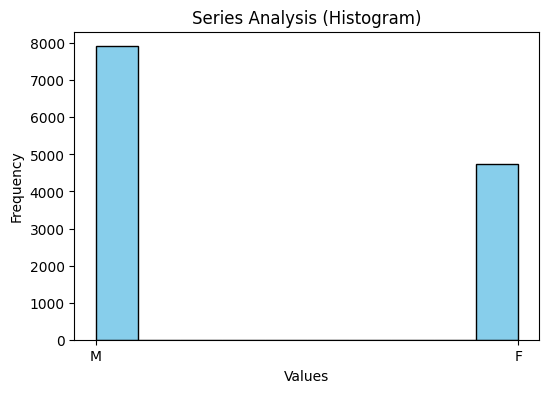

📊 Numeric Summary:


TypeError: Could not convert string 'MMMMMMFMMMMFFMFFMMMMFMMMFFMMMMFFFFFFMMFFMFMMMFFMFMFFMFMFFMFFMMMMFFMFMMMFFFMFMFMMMMFMFMMMMMMMMFFMMMMMMMMMMFFMMMMMFFMMMMMMMMFFMMMFFMMMFMMMFFMFMMMMMMMMFMFMMMMFMMMMMMMMFMMMFMFFMMFFFFMFMFMMMMFFMMMFMFMMFMFMMFMFFFFMMFMMMFMMMMFMMFFMFMMMFMMMMMFMMMMFMMFFFMMFMFMMMFMMFMFMMMFFMMMFMMFMMMMMFMMMMFMMMFFMMMMMMMMMFMFFFFMFMFMMFMMMFMMMFMFMMFFMMMMMMMMMFFMMFMMMFFMFFMMFMMMMMMMMFFFMFMMMMFMMFMFFMMMFMMMFMMFMFFMMFFMFFMFFFFFMFMFMMFMMMFMMFFMMFMMMMMMFMFFMMMMMMMMMMMFMFFFMMMMMFFMMMMFFFFFMFMFMMMMFFFMMMFMMMFMMMFFMMMMMFFFFFFMFFFFFFFMFMMMFMMMMMMFMFMMMMFMMMMFFMFMFMFFFFMMFMMMFMFMMFFMMFFMFMMFFMMMFFMMFFMMFFMMFMFMMFFMMMFMFMMFFMMMFMFMMMMMMFMMFMMMMMMFMMMMMFFFMMFMFFFFMMMFMMMFMMFFFFFMMFMFFMMMMFMMFMFMMFMMMMMMFMMMMMMFFMFFFMMMMMFMMMMMMMFMMMMMMMMMMMFFMMFMFMFMMMMMFFFMFFFFMFFMMMMMFFFFMFMFMFMMMMFFMMMFFFMMFMFFFFMFMFFFFFMMFMMMMFFMFMFMMMMMMFMFFFFFMMMMMMMFMFMMMMMFFMMMMFFFFMMMMMMFMMFFMMMMMFMMMMFFMFFMFFMMMFMMFMMFMMMMFMFFMMMMMFMFFFMMMFMFFMMMMMMMMMFMMMMFMMMMMFFFMMMMFMMMMFFMMMMFMMMMFFFFMMMFMMMFMMMMMFFMFFMFMFMMMMFFFMMMFMMFMMFFMMMMMFMMMMMMFMMMFFMMMMMMFFFFMFMMMMMMFFFMMMMMFMMFMMMMFMMMMFMMMMMFMMMMFMMMFMFMMFMMMMMMMFMFMMFFMMMFFMFFMMMMMFFFMMFMMMMMFMMMFMMFFMFMMMMMMMFMMMFMMFFFMMMMFMMMMFFFMFFMMFMFFMMMFMMFMMFMFFFFFMFFMFMMMFFFFMMMMMMFFMFMMMFMFMFMMMFMFFFFFMFMFMMMMFFFFMMMMFMMFMMFMFFMFMMMMFFMMFMMMMMMMFMFFMMMMMMMMMFFFFMMFMFMFFFFFFFMMFMMMMFMMMFFFMMMFFMMMFFMMMMMMMMFMFMMFFMMFFMMMMMFMMMMMFMFFFMMMFMFFFFMFMFMMMFMFFMMMFFMMFFFFFMMFMFMMMMMFMMMMMMFMMMMFMMMMMFMFFMMMMFMMMMMMMMFMMMFMMFFMMFMMFMMMMFMFMMMMMMMFFFMFFMMMMMMFFFFMMMFMFFMMFMFMFMMMMMMMMFMMMMFFMMFMFMFFMMMMMFMFMMMMMFMMMMMFFMMMFMMMFFMMMMMMMMFFMMMMMMFFMMFMMMFMFMMFMFFFMFMFFMMFFMMMMMFFFFMFFFFFMMMFMFFFFFMFMFFMMFMMMFMFFFFFMMMMFFMMMMFMMMMMFMMFMMMMFFFMMMMFMFFMMFMFMMFMMFMFMMFMMMMFMFMMFMFMFFMFMMMMMFMFMFFMMFMFMMMFFMFFFFFMFMFMMFMMFMMFMMFMMFMMMMFMMMMMMMMFMMMMMMMFMMMFFMMMMFMFFMFMMMMMFMMFFMFMMMMMMMMFMFMMMFMMMMFFFFMMMFMFFFMMFMMMMMMMMMMMMMFMMMMMFFMFMFMFMFMMFMMMFFMMFMMMMMFFMMMFMMFFMFMFFFMFFMMMFFMFMFMFMFMFFMFMMMMMMFFMMMMFMMMFMFMMMFMMMFMMFFMFMFFMFMMFFMMMFFMMMMMMFFFMMFMFMFFMMMMFMMMMMFMMMMMFFMMMMMMMMFMFFMFFMMMFMMMMMMMMFFMFFMFMMMFFMFMFFMFFMFFFFFFFFFFFFFMFMMFMFMFFFMFMFMFMFMFMMMMFMMMMMMFFMFMMMMFMMMFFMMFMMMMMMFFMMFMFMFFMMMFFMFMMMMFMFMFFFMMMMMMMMMMMMMMMFMFMMMMMMMMMMFFMMMFMFMMFFMMFMFMFFMMFMFFFMMMMFMFFFMMFFFMFMFMFFFFFFFFMFFMFMMMFFMMMMMMFFMFMFFFMMFMFFFFMFMMMMMFFMFMMMMMMMMFMFMMFMFFMMMMFMFFMMMFMMFFMFMMMMMFFMFMFMMMMMMMMMFFFFFFFFMMMMMMFFFMMFMMMFFFFMFMMFMMMFFMMMMFMMMMFMFFMFMMMMFMMFFMFMFMFMMFMMMMMMMMMFFFMMMFMMMMMFMFFMFFMMMMMFMMMFFMFMMMFMMMFMFFFMMMMFFMFFMMMMMFMFFFMMMFFMMFMFFFMFMFMMMFMMFFMMFMMFFMMFFFFMMFMFMMFFMMMMFFFFFMFFFMFMMMMMFMMMMFFFFMFFFMMFMMFFFFFMMMFMMMFMFMFMFFFMMMMFFFMFFFMMFFMFFFFFFFMMMMFMMFMMMMMMMFMFMFMMMMFFMFFFMFFMMMMMMMFMMMFFMMMMMMMMFFMFFMMMMMFMMMMFMFFFMMFMFMFMMFMMFFMMFMMFMMMMMMFMFFFFMMMMMMFMMFFMFFMFMFMMMMMMFMFMMFFFMMFFMMMMMMMFMMFFMMFFFMFMMFMMMMFFMMFMFFFMMFFMMMFMMMFFFFFMMMMMFFMMMMFMMMMFFFMMFMMMMFFMMMMFFMFFFMFMMMMFMMFFFMMMFMMFMMMMFMFFMMFFFFMFMMMFMMMFMMMMMFFFMFMMFMFMMMMMMFMMFFFFMMMMMFFMMMFMMFMFFMMMMFFFFMFFMMMFFFMMMFMFFMMFFMMFMMMFFFMMMFFMMFMMMMFFMFMMMMFMMFFMMMFMFFMMFMFFMFMFMMMFMFFFMMMMMFFMFMFMFFFFFFMFFMMFMMFFMMFFFFFFMFMMFMMFFFMFFMMMFFMMMMMFMFFMFFFMMMMFMFMMFMFFFMFMFFMMMMMFFMFMMMFFMMFFFFMFMMMMFMMMFMFMFMFFMMMFMFMMFFMMFMFMFMMMFFMMFMFMMFMFMFMFMFFFMMMMMMMMMFFFMFFMMMMMFMMMMMFFMFFMMFMMMMFMMFMMMFFMMMMMMMFMFMMFMFFFMMMFMFMFMMMFMMMMFMMFMMMFMMMFFMFMMMFFMMMMMMMMFMFMMMMFFFMMMFFFMMMMMFFMFMMMFMMMMMMMMMMFFMMMMMFFFFFFMMMFFMMFFFFMFMMFFMMFMMMMFMMFMMMMMFMMMMMMMMFMMFFFFMFMFFFFMFMFMFMFFFFFMMMMFMMFFMFFMMFMFMMMFFFMMFFFFMMMMMFMMFFFFMMFMFFMFMMMMMMMMMMFMMMFFFFFFFFMFMMMMMMFFMMMMFFFMMMFMMFMMFFMMMFFFMMMFMMMMMMMFMFMFMMMFFFFMMMFMMMMMFMMMFMMMMMFMMMMMFMMMMMMMMMFFFMMMMMMMFMMMFFFMMMMMFMMMFMMMMMMMMMMFMMMMMMMFFFMMMMMFMMMMFFFFMFFFMFFFFMMMFFFMMFFFMMMFFFMMFFMMMMMMMMMMMMMMFFFMFFFFMFMMFMMMMMMMFMMMMMMMMFFMMMMMMMMMFMFMMMMMMMFMFFMMFFMMMFMFMFFFMFMMMMFMMMFMFMMFFFMMFMMMMMFMFMFMMMMMMMMMMMMFFFMFMFFMFMMMFMFFMFMMFMFMFMMFFFFMFMFMMMMMFFFFFMMMMMFFFMFFFFMMMFMFFFFMMMMMFFMMMFMMFMMMFMMMMFFFFFMMFFFFMMMFMFMMFMFFMFMMFMMFMFMFMMFFMMMMMMMMMMMFMFFMMMFMMMFMMFMMMMMFMFMMFMMMFFFMMFMFMMMMMFFMMMFMFMMFFFMMFFFFMMMFFFMMMFMMMFMMFMFMFFFMMFFMMMMMMFMMMMFFMFFMFFMMMFFMMMFMFFMMMFMMMMMMMMMMMMMMMFMMMMFFMFMFMMFMMFMMFMMMMMMMMMMMMFFMFMMFMMMMFFMMMFMMMMFFFMFMFFMFMMFFMMMMFMFMMFMMMFFFMFMFFFMFMFFMMFMFFFMMMFMFFFMMFFMMMFFFMFFMFFMMMMFFFFFMMFMMMMMFFMFFMFMFMMMMMMFMFFFFFMFMMMMFMMMFMMMFMFMMMFFMMFFMFFFMMFMFMFFFMFMFMMMFMMMMFMFMFFFFFMFFMMMMMMFMFMMFFFMMFMMMFFMMMMMFFMFMFMMMFMMFMMMFMMMFMFMMMMMMMMMMMMFFFMFMFFMMMFMFMFMFMFMFMMFFFMFMFFMMMFMMMFFMMMMMMMFFFFMMFMMMFMFFFFFFFMFMFMMFMMMFMMMFMMMFFMFFFMMFMMMMMMFMFMMMMMMMFMMMMFMMMMMMFMMFFFMMMFMMFMMMFMMMMFMMMMFMMFFMMFMMFMMFFMFMMFMFMMMMFFMMMMFFMMFFMFFFMFFMMMMFFFMMFFMFMMFMMMMFMMMFMMMMFMMMFFMMMFFMMMFMFMMMMMFMMMMMMMFFMMFMFMFFMFFMMMMFMMFMMMFMMFMMFMFMFMMMMFFMFMFFMMFMFMMFFFMMMMFFFMFFMMFMFMFFMMMFMMMFMFFMMMFFMMMMMMMMFMMFMMMMMFMFFMFFMMMFMMMMMMFMMFMMMMMMFMMMFMFMMMMMMMMMFMMFFMFFMFMMMMMMFMFFMMMFMMMFFFMMMMMMMMMMMMFMMFFFMMFMMFMMMMMMMFFMFFMMFMFMMMMMMMFMFMMMMMFMMMMMMFMMMFMMFFMMFMMFMMMMMFFMFMFFMMMMMMMMFMFMMFMFFMFFMMMFFMMFFFMMMFMMMFFFMFMMFFFMMFFMFMMMMMFMFMFMFMMMMMMMMMMMMFMMMMMMFMMMMMMMMFFFFMMFMMMMFFFMMMMMMFMMMFFFMFMFMMMFMFMFFFFMMMFMMMMMFFMMMMMMMMFMMMFMMMMMFMMMMFFFFMMMMFMMMFMFFMFMMMFFMFMMMMFMMFFFMMMFFFMMFFMFFFFMMFMMMMMMFMFFFMMMMMFMMMMMMMMMMFMMMMFFMFFFMFMFMMFMMFMMFMFMFMMMMFFFMFFMFFMFFMMMFMMFFFMMMMMMMMFMMMMMFMMMFMMFFMMFFFMMMFMMFMMMFMMMMFMFMFFMMMMFMFMMMFMMFFFFFFMFMMMFMFFMMMMFFFMMMFMMMFMMMFFFFMMMMMMMMFMFMFMFMFFMMMMMMMMFFMFMFMMMMMMMMFFMMFMFMFMMMMMMMFFFFFMMFFFMMFMMFFMFFFMMMFMMMMMMMMFFMMMFMFFMMMFFFFFFMMFMMFMMMFFMMMMMMFMMFMMFFFMFFMMMFMMFMMMFFMMFMMMMMMFMMFMMMFMMFMFMMFMMMMMFMMFMMMMFMMMMFMMFFMMMMMMFMFMMMMMFMMFFMFMMMMFFMFMFMMFMFFMMFMMMFMMMMMFMMFMMMMMFFFMMMFMMMMMMMMMMMMFMFFMFFMMMMMMFMFFFFFFFMFMFFMMMFMMMMMFFMMFMFMMMMFMMMFMMFMMMFFMFFFMMFMFMMMMMFFMMMFMMMMMMMFMMMMFFFFFFMMMMFMMMMMMMMMMMMFMFMMMMMMMFFFMMFFMMMMMMFFMFMMMFMFMMFFFMMFMMMFFFFFMMMMMFFMMMMMMMMMFMMFFFMFFFFMMFFMMFMFFMFMFFFFFMMFFFMMFMMFFMMMMFFMFFMMMMMMFFMFMMFMFFFFFMFMFFFFFFMFFFFMFFFMFMFMFFFMMFFMFFFFFMFMFMFMMMMFMFMFFMMMMFFMMFFFMMMMFFMFMMMMFFFFFFFFMMMMMMMFFFMMMMFMFFMMFMFMFMMMFFFMMFFMMMMFFFMMMMFFFMMMMFFFMFFFMMMMFMMMMFMFMFMFMMMMFFMFFMFMMFMMMFFMFMMMFMMFMFFMMMMMMMMMMMMFMMMMFMMMMFMFMFMFFMMMMMFMMMMFMMFMMFMMFFFMMFFMMMFFMMFMMMMMMMFFFFMFFMMMMFMMMFFMFMMMMMMMMMMFFFMFMMMFMMMMMFFFMMMMMMMMFFMFFMFMMFMFFMMMMMFMFMMFMMMFMMMFMFMMMMFMFMMFMMMMMFMFFFMFFMFMMFFFMMMFFFMFFMMFFMFFFMFMMFFMFFMMMFMMMMMFMFMFFMMMMFFMMFMMMMFMMMFMMFFFMMMFFFMMMMMMMMFMMFFFFFMFFMMMFMMMMMFFMMMFMMMMFMMMFMFMMMMFFMMFMMMMMFFMMFMMMMMMMMFMMMMMFMMMFMMMMFMFMMMFMFMMFFMMMMMMMMFFFMMMMMMMMMMFFMMMFMMMMMMMMMMMMFFFFMMMMFMMMFMFMMMMMMMFMMMMMMMMFFMFMMMMMFMFMMMMMFFMMMMMFMFMMFFMMFMFFMMFFMMFMMMMMFMMFMMFFMMFFMFMMFMMFFMMMFFMFFMMMMFMMMFMMMMMFFMMMMMMFFFMFMFFMMMMMMMMMFFFMMMFMFFFMFFMMFFFFMFFFFMMMMMMFMMMFMMMFMMFMMFFFFFFFFFMMMMMMMFMFMFMFFMMMFFMMFFMMFMFFMMMFMFFMMFFFMMMMMMMMMMMMFFFMMMMFMMMMMMMMFMMMMFMFMMMMFMFFFFMFFFMMFFMMFMFMMMMFFMMMFMMFFFMMMMFMFFFMMMFMFFFFFMFMMMFMFMMMFMFFFFFMMFMMMFFMMMMMFMMFFFMMMMMMMMFFMMFFMMMFMMFFMMMMMFFMMFFMMMMMMMFMFFFFFFFMMMMMFMFMMMMMFMFFFFMFMMMMMFFMMMFMFFFMFMMMMMMMMMMMMFMMMFMFMMMMFMMMMFFMMFMFMMMMFMFFMFFMFFMMMMMFFFMMMMMFMMMMMFFMMMFMMMMMMMFMMMFMMMMFFMMMMFMMMMMMMMFFMFFFMMMFMFMFFFMMMFFMMMFMFFMMMMMMFMMMFMFFMMMMFMMFMFFMMFFFFMMFMMFMMMMFMMMFFFMMMMFMFMFFMMMFFFFMFFMFMMMMMMFMFMFFFFMMMFMMFMMMMMMFMMMFMMMFFMMFMMMMMMMMMFMMFFFMMMFMMFMFMMMMMMMMFMMMMMFMFMFFFFMMMMMMMMMMFFFMMMMMMFFMMMMMFFMFFMMMMFFMMFFMMMFMMMMMMFFMMMMMMMMFFFFMFMMFMMMFFFMMMMFMMMFMMFFMMFMFFMMMMFFMMFFMMMMFMMMMMMMMMMMMMFFFMFMFFFFMMMMFMFMFMFMFMMMFFMMMMMMFFMMFFMMFMMMMMMMFMFFFMMMMMMMMMFFFMFMMFMMMMFFFMMMMMMFFFFMFMMMMMMFMFFFMMFMMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMFFMMMFMFMMMMMMFMMMFMMMFFFFFMMFFMMMMMMMFMMMFMMMMMFFMMFFMFFFMMMMMFMMMFMMFMMMFFMFMMMFMMFMFFMFMMFMFMMMMMMMFMFMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFMFFFMMFFMMMMFFMMMMMMFMFMFMMFMFMMMMMMMMMFMMFMMMMFFFFMMMMMMMFFFFFFMMMFFMMFFMFFMMMMFMFMMFMMFMMFFMMFFFMMMMMMFMMMFMFMMMMFMMMFMFMMMFMMMMMFMMFMFMMMFFFMFFFMMMFFMMMMMMFFFFMMMFFFMMFMMFMFMMMMMFFMMFFMMFMMMMMMMFMMFFFFFFMFFMFMMMFFMMMMFMMMFMMFMMFMFFMMFMMMFFMMMMFFFFMMMMFMFMMFMMMMMMMMFMMFMFMFFMMFMMFMFMMFMFMMFMMMFMFFFMMMMFFFFFMMFMFMMMMFFMMMFMMMFMMMFFMFMMFMMFFFMMFMMFMMMMMMFMMMFMMMFMMFMMMMMMMMMMMFMMFMFFMMMFFMMMMMMFFMFMMFMMMFFMMMMFMFMFMFMMFMMMFMMMMFMFMMFMMMMMMFFMMMFMFMFFMFMFMMMMMFMFMFFMMFMMFFFMFMMMMMMMFMFFMMFFMMFFMMFFFMMMMMMMMMMMMFMMFMMMMFMFMMMMMMMMMMFMMMMFMMMMFMMMMMMMMMMFMMFMMMMMMMMMMFFMFMMFMMFMFFFMFMMMFFMMMMFMFFMMMFMMFFMFMMMMFMMFMMFFMMMMMFFMMFMMMFMMMMMFFMMMFMMMFMMMMMMMFFMMMFFMFFMFMMMMMMMMMFFMMMFMMMMFFFMMFFMMFMMMFFFFFMMMMMMMMFMMFMMFMMMFMFFFFFMFFMMMMMMFFFMMMFMMMFFMFMMMMMMMMMMMMMMMMMFMMMMMMMMFFFMMFMMMMMMMMFFMFFMMMMMMFMFMFMFMMFMMMMMMFFMMMMMFFMFFMMMFMMMMMMMMFFMFFMMMMFMFFMMMMMMMMFFFMFFMMMMMMMMMMMFMMMMFMFMFFMFMMMFFFMFMMFFFMFMMMMMMMMMFFMFMMMMFMFFFMMMMMMMMFMMFMMMMMMMMFFMMMMMMFMMMFMFMMMMMMFMMFMMMFFFMMMMMMMFMFMFFMMMMMMMFMMMFMMMMMFMMFMFFMMFMFMMMMMMMMMMMMFMMMMFFMMMFFFMMMMFMFMMMMMMFMMMMMMMMFFMFMMMMMMFMFMMMFFMFMMFMMMFMMMMFMMMMFMMFMMMMMFMFMMFMMMMMFMFFMMMMFFMMFFMMMMFFMFMFMMFFFFMFFMMFFFMMMFFMMFMMMMMFFMMFMMFMMMMMMMFMFMMMFFMMMFMFFMMMMMMMMMFMFMMFMMMMFFFFFMFMMFMFFMMFMFMMFFMFFMMMMMFFMMMMFMMMFFMFMMMMMMMMMMFMMMMMFMMMMFMMMFMMMMMFMMMMFFFFMFMMFMMMFFFFMMFFMFFMMFFMMMFMMFFMMFFFMFMMMMMMMMFFMMMMMFFFFMMMFMMMFMFFMMFFMFMMMMFMMMFMFMMMMMMMFFFFMMFMMFMMFMMMMMMFMFMFMFMFMMMFMMMMFFMMMMMFMFMMMMMMMFMFMMMFFFMMMMFMFMFMFMFMFMFFFMFMMMMMMFMFMMMMFMMMFMMFMMMMMFMFMFMMMMMMFMMMMMMFFFMMFMMFMMMMMMMMFFMMMFMMMFFMMMFMFMMMMMMMFMMFMMFFFMMFMMFFFMMFFMFMMFMMMMMMMFMMMFMMMFFMMFMMMFMFMMMMMMMMFFFMMMMFMFMMMFMFMFMMMMMFFMFFFFMFFMMMMMMMMFMMMFFMMMMFMMFFMMMFMMFFMMMFMMFFFFMMMMFFFMMFMMMMMMFFFMMMMMMFFMMFMFFMFMMMMMMMMMMMMFMMMFMMFFFMMMMFFFMMMFFMFFMMMFFFMMMFFFFMMMMFFMMFFFMMMMFFFFMFMFFMMMMMFFFMMFFMMMMMMMFMFMMMMMMMFMMMMMMMMMMMMMFFMMMMFMFMMMMFMFMMMMFMMFMMMMMMMMMFMMMFMMMMMMMMFFFMMFMFFFMFFFMFMMMMMMFMMFMMMMFFMMMMMMFFMFMFMMMFFFMMMFMMMFMMFFMFFFMMFFMFMMMMMFMFFMMMFMMMMMFMMMFFMMMMMMMMMMMMFMMMMFMFMFMMMMMFFFMFFMFMMMFFFMMMMMMMFMFMFMMFFMMFMFMMMMFMMMMMMMMFFMMMFFFFMMMFFFMMMFFFFMMMMFFFMFMMFMFMFMMMMFMFMFMMMMMFMMFMFFMMFMMMMMMFFMFMFFFMFFFFFFMMMFMFMFMMMMMFFFMMFFMMMMMMMMMMFFFFFFMFFMFMMFMFMMFFFFFMFFFFFFFMMMFFMMMMFMFMFMMMFMMMMMMFFFFMFFMMMFFFMMMFMFMFMMMFMMMFMMMMMMMMMMFFMMMFFFMMFMMMMMMMMMMFMMFMFMFFMMFFFFMMMMFMFMFMFFFMMFFMMMMFFFFFMMMMMMFMMMMFMFMFMMMMMMMMMMMMMMFMMFFMMMMMFFMMMMMFMMMFMFFFMFMFMMMMFMMMMMFFMMMMMMMMFFMMMMMMFFFMFFMFFMMMMMMMMMFFFFFFMMMFFFFFMMMFMMMMFMFMFFFMMFMMMMMMMMFMMMMMMMMMMMFFFFMMMMFFMFMMFFFMMMFFFFMFMFFMFFFMFFMFFMFMMMMMMMMMFFMFFMMMFMMFMFFMMMMFFFFMMFMFMMMMFMFMFMFMFMMMMFFFMMMMMFMMMMFFMMFMFMFMMFMFMMMMMFMFFMFMMMMMMFMMMFMFMMMFMFMMFFFFMMFFFMFFMMFMMMFMMMMMMMMMMFMMMMMMMMFMMFFMMMFMMMMMMMFMFMMMMFFMMMMMMFFFMMMMFFFFMMMMMFFMMMFFFFFMMMFMMMMMMMMFMFFFFFFFMMMMMMMFFMMFMMFFMMFMMMMMMMMMFFMMFMFFFMMMFMMFMMMMMMMFFMMFMMMMFMMMMMMMMMMMMMFFMFMMMFMFMFMMMFMMMFMFMMFMMMFFMMMMMFFFFMFMMFMMMMFMMFFMMFMMMMFMFMMMMMMMMMMMMMFMFFFFFMMFMMFMMFMMFMFMMMMMMMMMMMMMMFFMMMMMMMMMFFFMFMMMMMFFMMMFMFMFMMMFMMFMFMFFMMMMMFFFMFMMFMFFMFFMMMMMMMFMMMFFFMMMMMMMFMMMMMMMFMMMMFFMFMMMMMMFFMMFFMMMFMMFMMFMMMMMMMMMFFMMMMMMMMMFMFFMFFMMFMFMFFMMMFFMFMMFFMFMMFMFMFFFMMMMMMMMMFFMFFFFMMMFMFFMMFFMMFFMMMMMMFMMMFMFMFMMFMMFFFMMMFMMFMMMFFFMMMMMFMFMFMMFMMFMMMMMMMFMMMMFMMFMMMMFMMMFMMMMMMMMFFMFFFMFFMFMFMMFMMFMFFMFMMFFFMMMMFFMMFFMMFMMMFMFFMFMFFFMFMFFMMMMMFMMFMMMFMMMFMMMMMMMFFMFMFMMMMFMMMFFMMMMMMMFMMFMMFMMFFMFFMFFMMMMMFMMMFFFFMFFFMMFMFFMFMMMFFFFFMFMFMMFMMMFMFMMMFMMMMFFFMMMFFMMMMMMFMFFMMFFFFFMFFMMMFMFFMMMMMFFFFMMMFMMMMMFMMFFMFMFFMMMMMFFMMFFMMMFFMMFFFMMMMFMFFMMMMFMMMMMMMFMFMMMMMMFMFMMFMFFMFMMFMMFMMMMMFMMFMMMFMFFMMMFFMMMFFFMFFMFMMFMFMMMMMMMFMFMMFFFMMFMMMMMFFMFMFFFMMMFFFFMFFMFFMMFFFFMFFFMFMFFFMMMMMMFMFFMMFFMFMMMMFFMMFMFMMFFMFMFMMMMFMMFFMFFMMFMMFMFFMMMMMFFMFMFMFMMMMFFFFMMMMMMMFFMFMMMMFFMMMMMMMMMFFMMMFFMMMMMMFMMMMFMMMMMFMMFFFFFMFMMMMFMMMFFMMFMFMMFMMMMMMMFFFMMFFFFFFFMFFFFFFMFFMMMFMMMFMMFMMMMFMFMMMFMFFFMFMMFMMMFFFFFFMMMFFFMMMFFMMFMMMFMMMFFMMMFMMFMMFMFFFFMFMMMFMMFMMMMMMMFFMFMFFMMMMFMMFMMFMFMFMMMFFFMMMMMMMFFMFMFFFFMFMMMFMMMMMMMFMMFFMMMMMMFFFMMFMMMFFFMMFMMFFMMFFMMMMFFFMMMMFMMMMMMMFMMMMMFFFFMMMFFFMFMMMFFMFMFMMMMMFMFMMMMMMMMFMMFFFMMMFMMMFMMFMMMMFFMFFFMMMFFFFMMFMFMFMFMMFMMMMFFMFMFMFFMMMMMMMFMFFFFFMMMFMMMMFMMMMFFMFMFFMFFMFMMMMMFMMMMMMFMMMMMMMMMMFFFMMMFFMMMMFMFFMFMMFMMMMFMMFMFMMMMFMMFFFFFMMFMFMMMFFFMMMFMMMMMMMMFMMFFFFMFFMMMMMMFFMFMFFMMMMMFMFMFMFMFMMMMFMMMMFFFFFFFFFMMFMMMFFFMMFMMMMMMMFFMMFMFFFFMMMMMMMMFFMMMMFMMMMFFMMFFMMMMFMFFMMFMFMMMFMMMFMFMFFMMFMFFMMMFMMMMMFMMFMMMMMMMMMMFMFFFMMFMFMMFMMMMFMMFMMFMFMFMMFMMMMMFMMMFMFMMMMFFMMFFFMFFFMFMMMFMMFMFFFMMMFMFFFFFFFFFMFFMMMFFMMMMMMFMMMFMMMFFMMFMFMMFMFMFMMFMFMFMMFFFFMMFMFMMFFFMFMMMMMMMMFFMMMMFMFMMMMMMFFMMMMMMFMFFFFMMMMFMMFFMMFFMMMFFMMMMMMMMFMMFFFFFMFMMMFFMMMMMMMMMMFMFMFMMFMMFMMFFMMMFFMFFFMMMMFMMFMMFMFMMFMFFFFMFFFMFFFMMMFMMFFFFFMMMMMFMMMMMFFMMFMMFFFMMMFMMMMMMMMFMMFMFFMMMMMFMMMMMMMMMMFFFMMFFFMFFMMFMMFFMMMMMMMMMFFFFMFMFMFMFFMMFFFMFMFMFMMMMFMMFMMFMMFMMFMMFMMMMMFFMFFMMFFFFMFMFFMFMMFMFMMFMMMFMMMMFFMMFMFMFFMMMFFFMFFFFFFFMMFFFMFMMMMMFFMMMFMMFFMFFMMMFFMMFFFFMFFFMMFMMMMFMFMMMFFFFMMFMFMFFMFFFMFFFMFFFMMMFMFFFFFMFFFFMMMFFMMFFMMMMFMFMFMFMMFMFFMMMMMFMFMMMFMFMFMMFFFMFMFMFMFFFFMMMFMFFMMMFMMMMFMMFFFMMMFFMFMFMMFMMMFMMFMFMMMMMMFMMMFFFMMMFMMMMFMMMMMMMMFMMMMFFMFFF' to numeric

In [212]:
describe_and_plot(df_dropped['Gender'])
